# Latar Belakang
> Barbershop ini terletak pada salah satu kota di Jawa Timur, yang dibangun sejak 2021. Selain menerima service haircut, barbershop juga menerima service lain seperti haircolor, hairperming, dll, serta penjualan produk seperti pomade, hairpowder, dsb.

## Goals 
* Prediksi Jumlah Visitor pada Barbershop
* Prediksi jumlah kedatangan pelanggan pada salah satu store barbershop, yang akan digunakan sebagai penentuan stock barang maupun potensi penambahan karyawan
* Untuk mengoptimalkan stock & ekspansi bisnis, barbershop membutuhkan prediksi secara harian, berapa visitor yang akan datang pada beberapa hari yang akan datang.

## Penilaian
* Metrics yang akan digunakan untuk pengukuran akurasi adalah MAPE (mean absolute percentage error)




# Data Preparation

## Data yang digunakan adalah:

1. Data Transaksi: Data yang berisi transaksi tiap pelanggan yang datang, termasuk chanel payment dan product/service apa saja yang dibayarkan
    * Status (baru: pelanggan baru pertama kali datang, lama: pelanggan lama yang pernah datang)
    * Cukur ke (jumlah kedatangan customer ke store)
    * Capster (id pemotong rambut yang memberikan service)
    * Bayar (channel payment cash/qris)
2. Data Traffic Google Business: Data pada google business hasil dari marketing maupun proses lainnya (asumsi data di bulan april telah lengkap, sebagai proyeksi hasil marketing)
3. Data Pricelist Product: Data Harga product & service barbershop

In [21]:
# import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import numpy as np
import calmap

In [2]:
# Contoh untuk menjawab prediksi
answer = pd.read_csv("answer_contoh.csv")
answer.head()

,id,value
0,01/04/2022,29
1,02/04/2022,10
2,03/04/2022,27
3,04/04/2022,29
4,05/04/2022,14


In [3]:
# Prediksi (data testing)
test = pd.read_csv("answer_template.csv")
test.head()

,id,value
0,01/04/2022,NaN
1,02/04/2022,NaN
2,03/04/2022,NaN
3,04/04/2022,NaN
4,05/04/2022,NaN


In [4]:
# Data training
df_train = pd.read_csv("Data_Transaksi_Barber.csv")
df_train.head()

,Urutan,id_cust,Status,Cukur_ke,Capster,Hari,Tanggal,keterangan,Bayar,Haircut,...,Pomade 3,Pomade 4,Pomade 5,Pomade 6,Pomade 7,Pomade 8,Pomade 9,Conditioner,Hairtonic,Total Payment
0,1.0,26908171Haety,baru,1.0,irh,senin,16/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
1,2.0,26924970Riand,baru,1.0,irh,senin,16/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
2,3.0,25789556Buawa,baru,1.0,irh,senin,16/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
3,4.0,26770753Litan,baru,1.0,irh,selasa,17/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
4,5.0,26770753Tatan,baru,1.0,irh,selasa,17/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Urutan         2046 non-null   float64
 1   id_cust        2046 non-null   object 
 2   Status         2046 non-null   object 
 3   Cukur_ke       1993 non-null   float64
 4   Capster        2046 non-null   object 
 5   Hari           2049 non-null   object 
 6   Tanggal        2049 non-null   object 
 7   keterangan     3 non-null      object 
 8   Bayar          2049 non-null   object 
 9   Haircut        2049 non-null   int64  
 10  Haircolor      37 non-null     float64
 11  Creambath      9 non-null      float64
 12  Shaving        23 non-null     float64
 13  Vitamin        10 non-null     float64
 14  Powder A       32 non-null     float64
 15  Powder B       7 non-null      float64
 16  Pomade 1       10 non-null     float64
 17  Pomade 2       2 non-null      float64
 18  Pomade 3

---
Informasi mengenai variabel
Data float
1. urutan 
2. cukur_ke
3. haircolor
4. creambath
5. shaving
6. vitamin
7. powder A
8. powder B
9. Pomade 1
10. Pomade 2
11. Pomade 3
12. Pomade 4
13. Pomade 5
14. Pomade 6
15. Pomade 7
16. Pomade 8
17. Pomade 9
18. Conditioner
19. Hairtonic

Data int
1. haircut
2. total payment

Data Categorikal
1. id customer
2. status
3. capster
4. hari
5. tanggal
6. keterangan
7. bayar

In [6]:
df_train.isnull().sum()

Urutan              3
id_cust             3
Status              3
Cukur_ke           56
Capster             3
Hari                0
Tanggal             0
keterangan       2046
Bayar               0
Haircut             0
Haircolor        2012
Creambath        2040
Shaving          2026
Vitamin          2039
Powder A         2017
Powder B         2042
Pomade 1         2039
Pomade 2         2047
Pomade 3         2048
Pomade 4         2049
Pomade 5         2037
Pomade 6         2030
Pomade 7         2048
Pomade 8         2049
Pomade 9         2044
Conditioner      2039
Hairtonic        1905
Total Payment       0
dtype: int64

Variabel yang mungkin digunakan
* Status (baru: pelanggan baru pertama kali datang, lama: pelanggan lama yang pernah datang)
* Cukur ke (jumlah kedatangan customer ke store)
* Capster (id pemotong rambut yang memberikan service)
* Bayar (channel payment cash/qris)

In [7]:
df_coba = df_train.copy()
df_coba.head()

,Urutan,id_cust,Status,Cukur_ke,Capster,Hari,Tanggal,keterangan,Bayar,Haircut,...,Pomade 3,Pomade 4,Pomade 5,Pomade 6,Pomade 7,Pomade 8,Pomade 9,Conditioner,Hairtonic,Total Payment
0,1.0,26908171Haety,baru,1.0,irh,senin,16/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
1,2.0,26924970Riand,baru,1.0,irh,senin,16/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
2,3.0,25789556Buawa,baru,1.0,irh,senin,16/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
3,4.0,26770753Litan,baru,1.0,irh,selasa,17/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000
4,5.0,26770753Tatan,baru,1.0,irh,selasa,17/08/2021,NaN,Cash,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000


In [8]:
df_coba['Status'].unique()

array(['baru', 'lama', nan], dtype=object)

In [9]:
df_coba['Cukur_ke'].unique()

array([ 1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.,  0.,  9., 10., 11.])

In [10]:
df_coba['keterangan'].unique()

array([nan, 'LIBUR (TUTUP)'], dtype=object)

In [11]:
df_coba[df_coba['keterangan']=='LIBUR (TUTUP)']

,Urutan,id_cust,Status,Cukur_ke,Capster,Hari,Tanggal,keterangan,Bayar,Haircut,...,Pomade 3,Pomade 4,Pomade 5,Pomade 6,Pomade 7,Pomade 8,Pomade 9,Conditioner,Hairtonic,Total Payment
336,NaN,NaN,NaN,NaN,NaN,kamis,21/10/2021,LIBUR (TUTUP),Cash,35000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35000
337,NaN,NaN,NaN,NaN,NaN,jumat,22/10/2021,LIBUR (TUTUP),Cash,35000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35000
338,NaN,NaN,NaN,NaN,NaN,sabtu,23/10/2021,LIBUR (TUTUP),Cash,35000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35000


In [27]:
df_coba['Tanggal'] = pd.to_datetime(df_coba['Tanggal']).dt.date
df_coba["Tanggal"] = df_coba["Tanggal"].astype("datetime64")

In [34]:
df_date_group = df_coba.groupby(by=["Tanggal"])

In [18]:
max(df_coba['Tanggal'])

datetime.date(2022, 12, 3)

In [19]:
min(df_coba['Tanggal'])

datetime.date(2021, 1, 9)

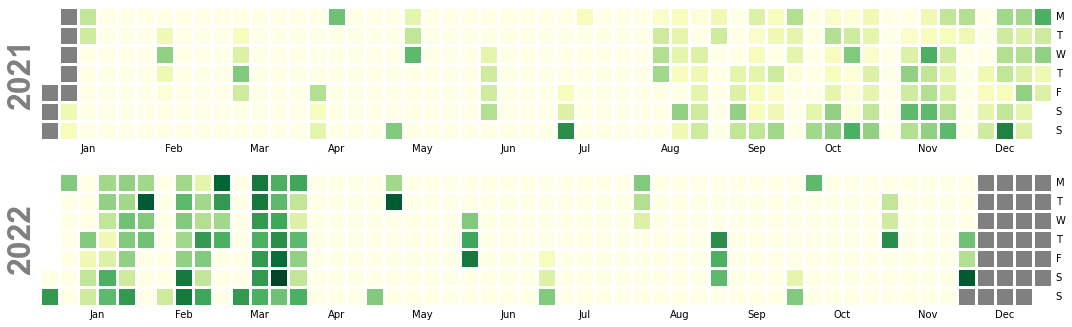

In [35]:
Transaction = df_date_group["Tanggal"].count()

fig,ax = calmap.calendarplot(Transaction, monthticks=10, daylabels='MTWTFSS',
                    fillcolor='grey', linewidth=3, cmap='YlGn', 
                    fig_kws=dict(figsize=(15,5)))